In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
data = pd.read_csv("data/ex1data.tsv", sep = "\t")
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


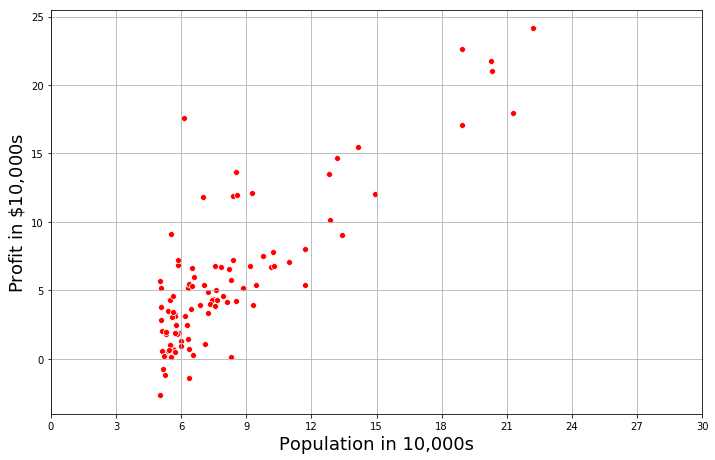

In [5]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(x = "population", y = "profit", data = data, color = "r")
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.xlim(0, 30)
plt.show()

In [6]:
x = data[["population"]].values
y = data[["profit"]].values

In [7]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [8]:
model = sbbml.LinearRegression(alpha = 0.01, normalize = False)
model.fit(x_train, y_train)
model.theta

array([[-3.31035753],
       [ 1.15511472]])

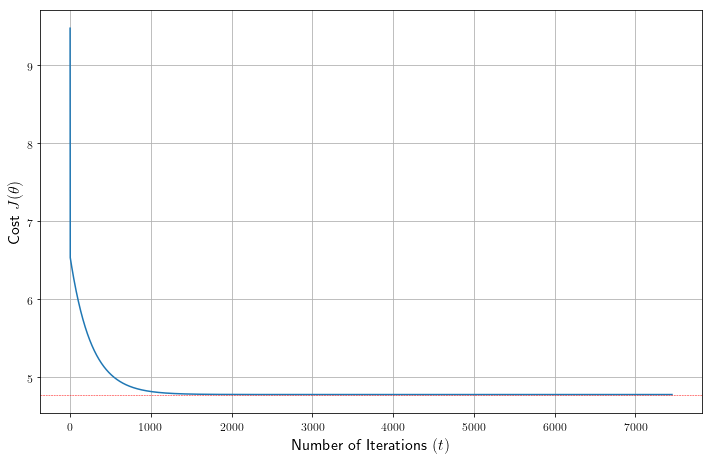

In [9]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [10]:
y_prime = model.predict(x_test)
utils.root_mean_squared_error(y_prime, y_test)

2.665151216977235

In [11]:
model = sbbml.LinearRegression(alpha = 0.01, normalize = True)
model.fit(x_train, y_train)
model.theta

array([[6.46922678],
       [4.77543305]])

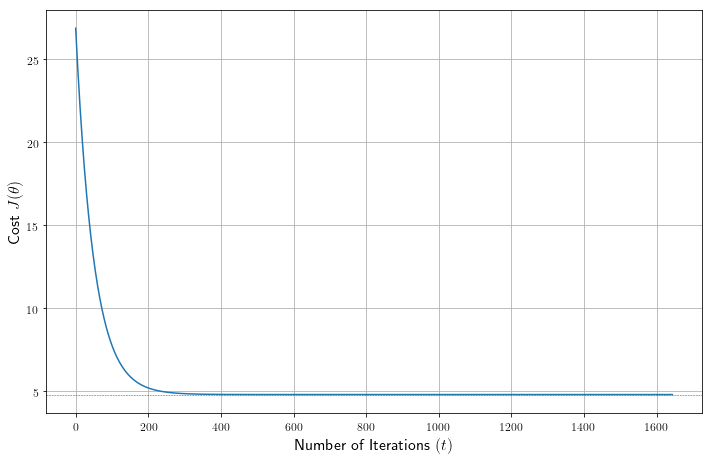

In [12]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [13]:
y_prime = model.predict(x_test)
utils.root_mean_squared_error(y_prime, y_test)

2.665150517632388

In [14]:
x_prime = np.linspace(0, 30, 100).reshape(-1, 1)
y_prime = model.predict(x_prime)

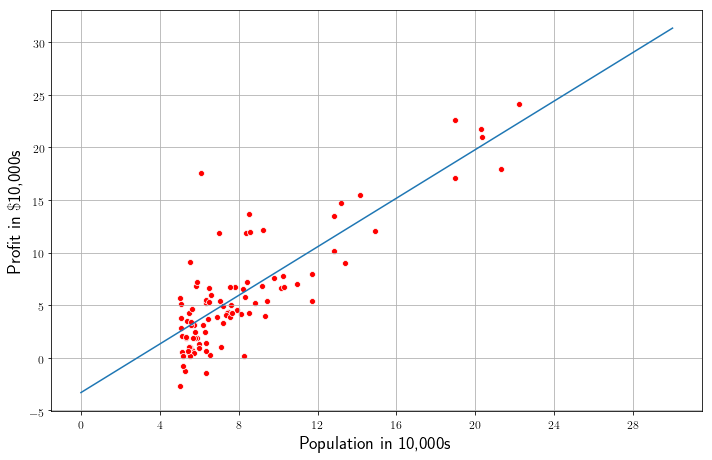

In [15]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
sns.scatterplot(data = data, x = "population", y = "profit", color = "r")
sns.lineplot(x = x_prime.flatten(), y = y_prime.flatten())
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [16]:
model = sbbml.LinearRegression(alpha = 0.01, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

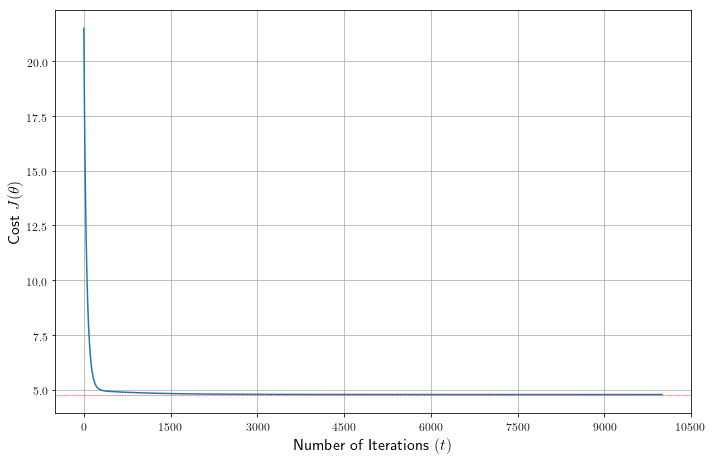

In [17]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [18]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
utils.root_mean_squared_error(y_prime, y_test)

2.6822266764704157

In [19]:
x_prime = np.linspace(0, 30, 100).reshape(-1, 1)
x_prime_poly = utils.map_polynomial_features(x = x_prime, degree = 3)
y_prime_poly = model.predict(x_prime_poly)

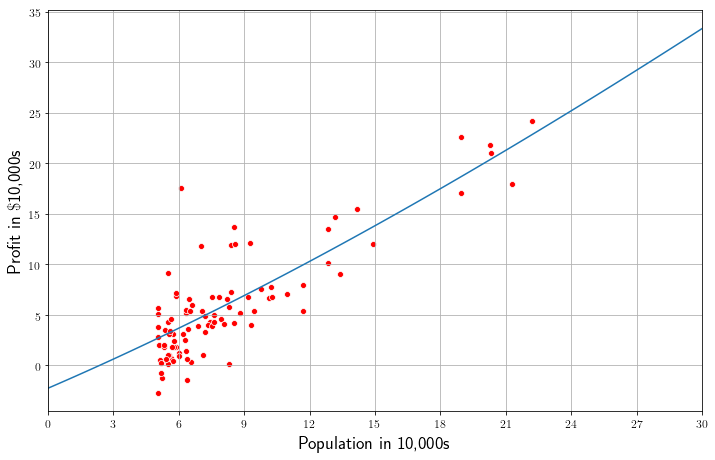

In [20]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(data = data, x = "population", y = "profit", color = "red")
sns.lineplot(x = x_prime.flatten(), y = y_prime_poly.flatten())
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()
plt.xlim(0, 30)

plt.show()

In [21]:
data = pd.read_csv("data/ex2data.tsv", sep = "\t"); data.head()

,size,number_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


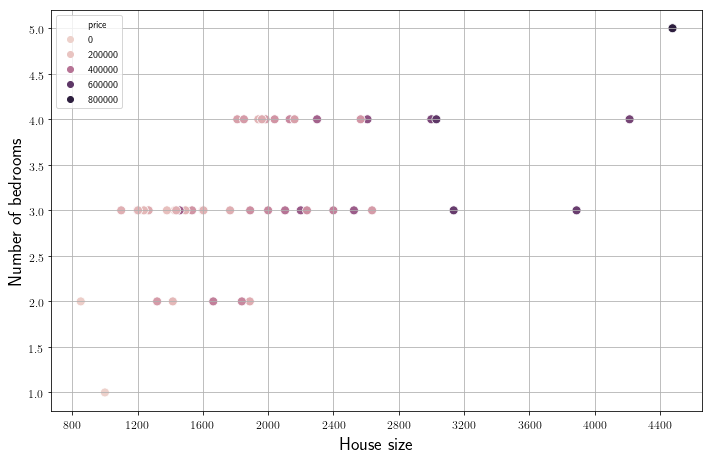

In [22]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax = sns.scatterplot(data = data, x = "size", y = "number_bedrooms", s = 80, hue = "price", palette = "Set1")
ax.set_xlabel("House size", fontsize = 18)
ax.set_ylabel("Number of bedrooms", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [23]:
x = data[["size", "number_bedrooms"]].values
y = data[["price"]].values

In [24]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [25]:
model = sbbml.LinearRegression(alpha = 0.01, normalize = True)
model.fit(x_train, y_train)
model.theta

array([[ 3.39478270e+05],
       [ 1.19290349e+05],
       [-1.88054011e+02]])

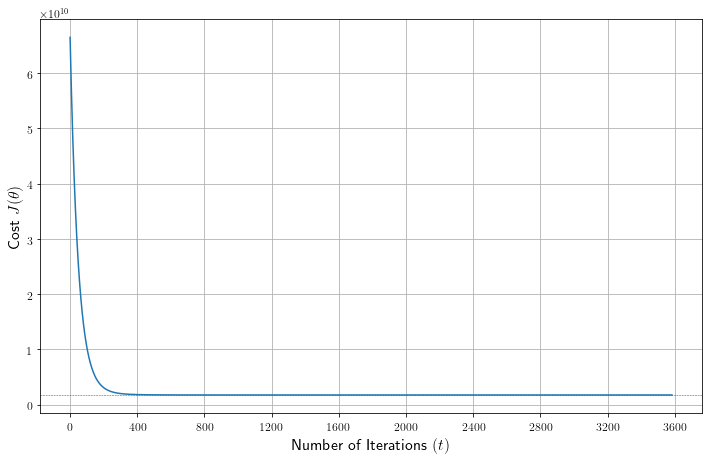

In [26]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [27]:
y_prime = model.predict(x_test)
utils.root_mean_squared_error(y_prime, y_test)

81187.34109021131

In [28]:
model = sbbml.LinearRegression(alpha = 0.01, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

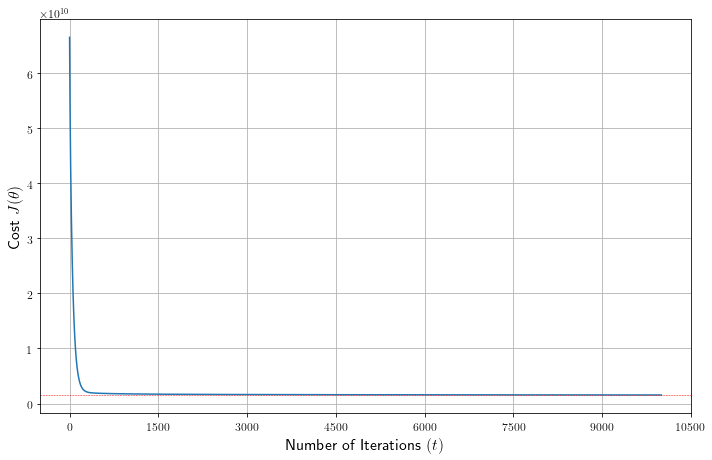

In [29]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [30]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
utils.root_mean_squared_error(y_prime, y_test)

80575.34953142072

In [31]:
model = sbbml.RidgeRegression(alpha = 0.01, gamma = 1.0, normalize = True)
x_train_poly = utils.map_polynomial_features(x = x_train, degree = 3)
model.fit(x_train_poly, y_train)

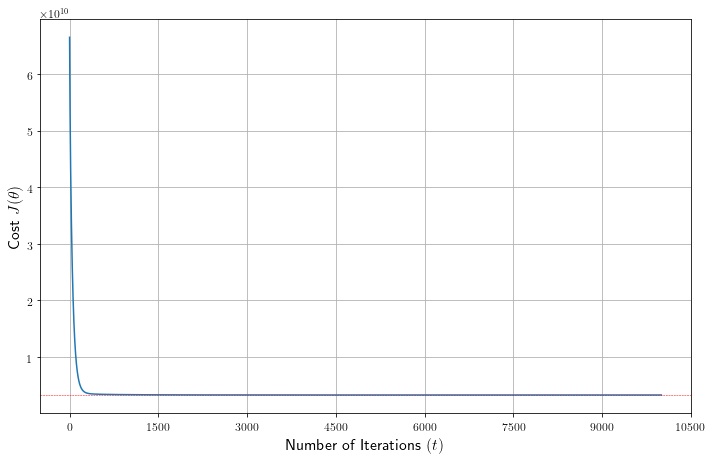

In [32]:
utils.plot_cost_function(cost = model.cost, width = 10.0, height = 6.5)

In [33]:
x_test_poly = utils.map_polynomial_features(x = x_test, degree = 3)
y_prime = model.predict(x_test_poly)
utils.root_mean_squared_error(y_prime, y_test)

83986.00434140224